In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
da=map(lambda x:x.split(),open('table3.dat').readlines())
pet=map(lambda x:x.split(),open('../DLA_DR12_v2.dat').readlines()[2:])

In [3]:
#Granet catalog
nHi=np.array([float(x[-1]) for x in da])
z=np.array([float(x[-2]) for x in da])
p=np.array([float(x[-3]) for x in da])
pn=np.array([float(x[-4]) for x in da])
tid=[int(x[0]) for x in da]

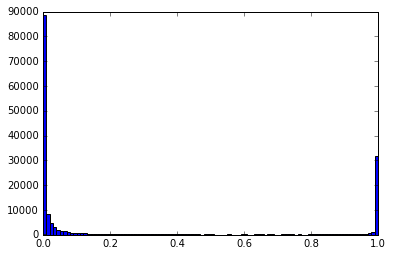

In [4]:
_=plt.hist(p,bins=100)

In [5]:
# Pasquier catalog
tidp=[int(x[0]) for x in pet]
zp=[float(x[9]) for x in pet]
nHp=[float(x[10]) for x in pet]

In [6]:
# For all objects in Pasquier catalog find the corresponding probabilities in the Granet catalog
c=[]
fl=0
for i,t in enumerate(tidp):
    if (i%1000)==0:
        print i,fl
    try:
        i=tid.index(t)
        c.append(p[i])
    except:
        fl+=1

0 0
1000 9
2000 17
3000 24
4000 33
5000 42
6000 53
7000 60
8000 63
9000 71
10000 77
11000 92
12000 106
13000 114
14000 125
15000 134
16000 142
17000 153
18000 159
19000 165
20000 170
21000 177
22000 182
23000 190
24000 196
25000 209
26000 212
27000 221
28000 226
29000 232
30000 241
31000 247
32000 257
33000 267
34000 279


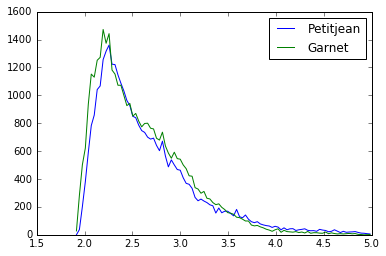

In [8]:
# Plot histogram of DLA redshift in the two catalogs
histp,edp=np.histogram(zp,bins=100, range=(1.9,5.0))
w=np.where(p>0.80) #take just p>0.8 from Granet as true DLAs, gives a right number
hist,ed=np.histogram(z[w],bins=100,range=(1.9,5.0))
def m(x):
    return 0.5*(x[1:]+x[:-1])
plt.plot(m(edp),histp,label='Petitjean')
plt.plot(m(ed),hist,label='Garnet')
plt.legend()

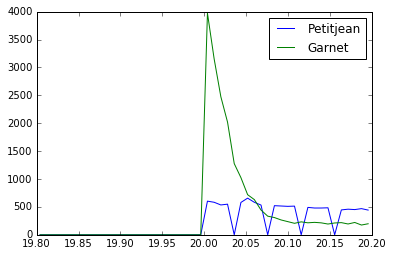

In [9]:
# plot histogram of nHI in the two catalogs
histp,edp=np.histogram(nHp,bins=50,range=(19.8,20.2))
w=np.where(p>0.80)
hist,ed=np.histogram(nHi[w],bins=50,range=(19.8,20.2))
def m(x):
    return 0.5*(x[1:]+x[:-1])
plt.plot(m(edp),histp,label="Petitjean")
plt.plot(m(ed),hist,label="Garnet")
plt.legend()

In [10]:
(np.array(p)>0.80).sum()  ## how many with p>0.8?

37355

In [11]:
#plot col density in one vs the other?
pc=p[w]
nc=nHi[w]
tidc=list(np.array(tid)[w])
xx,yy=[],[]
fl=0
for t,x in zip(tidp,nHp):
    try:
        i=tidc.index(t)
        xx.append(x)
        yy.append(nc[i])
    except:
        fl+=1

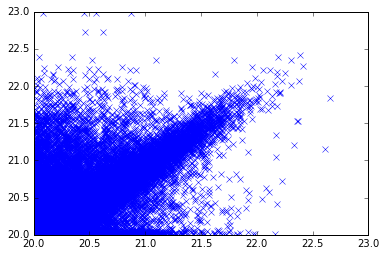

In [12]:
plt.plot(xx,yy,'x')